In [12]:
%pylab inline
import xarray as xr
import dask.array as da


Populating the interactive namespace from numpy and matplotlib


In [34]:
data = xr.open_dataset("wd/8aa7b/nondim.nc", cache=False)

u = data.U.isel(z=10).compute()

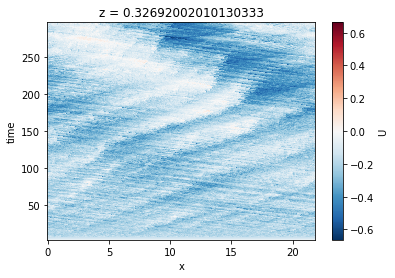

In [35]:
u.plot()

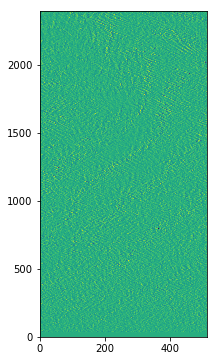

In [117]:
axis = u.get_axis_num('x')
f = np.fft.rfft(u.data, axis=axis)
mask = np.r_[:f.shape[axis]] > 20

fsmall = f * mask
u_p = np.fft.irfft(fsmall, n=512, axis=axis)

plt.figure(figsize=(3,6))
pcolormesh(u_p)

The power spectrum of u is given by

In [113]:
fm = f[1000:].mean(axis=u.get_axis_num('time'))
pw = fm*np.conj(fm)
loglog(pw[1:])

/home/ndb245/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
